# Technique Assignment 4: Principal component analysis
## Cogs Fall 2020
### Due: Nov 17 11:59pm
### 100 points total
### Xing Hong A15867895

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Part 1

In [2]:
## Load Fisher's iris dataset
iris = datasets.load_iris()

In [3]:
## Take the transpose of the data so PCA works out nicely
irisInputs = iris.data.T
m, n = irisInputs.shape
print("m =", m, "n =", n)

m = 4 n = 150


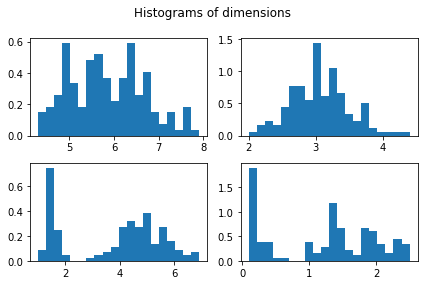

In [4]:
## Histogram plots

plt.subplot(2, 2, 1)
plt.hist(irisInputs[0], bins=20, density=True)

plt.subplot(2, 2, 2)
plt.hist(irisInputs[1], bins=20, density=True)

plt.subplot(2, 2, 3)
plt.hist(irisInputs[2], bins=20, density=True)

plt.subplot(2, 2, 4)
plt.hist(irisInputs[3], bins=20, density=True)

plt.suptitle('Histograms of dimensions');

plt.tight_layout()

In [5]:
irisInputs[0].var(), irisInputs[1].var(), irisInputs[2].var(
), irisInputs[3].var()

(0.6811222222222223,
 0.1887128888888889,
 3.0955026666666665,
 0.5771328888888888)

The third row (dimension 3)has the greatest variance.

In [6]:
## Find the mean of the data
mean4d = np.mean(irisInputs, 1)
print(mean4d)

[5.84333333 3.05733333 3.758      1.19933333]


In [7]:
dataMean = np.tile(mean4d, (n, 1))

In [8]:
## Create Z, the zero-meaned data matrix

Z = irisInputs - dataMean.T
print(Z.shape)

(4, 150)


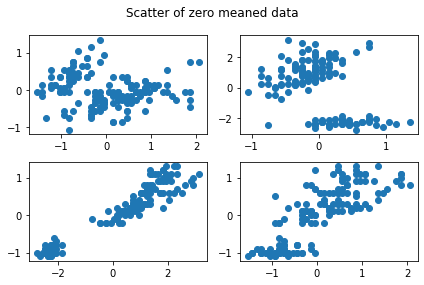

In [9]:
## Plot 2 dimensions of Z to make sure it's centered around 0 (optional)
plt.subplot(2, 2, 1)
plt.plot(Z[0, :], Z[1, :], 'o')

plt.subplot(2, 2, 2)
plt.plot(Z[1, :], Z[2, :], 'o')

plt.subplot(2, 2, 3)
plt.plot(Z[2, :], Z[3, :], 'o')

plt.subplot(2, 2, 4)
plt.plot(Z[0, :], Z[3, :], 'o')

plt.suptitle('Scatter of zero meaned data')

plt.tight_layout()

In [10]:
# Coveriance matrix of Z

C = np.matmul(Z, Z.T) / (n - 1)
print(C.shape)

(4, 4)


In [11]:
print(C)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


The shape is correct, they represents the coveriance of the dimensions between each other.

### 5. 
a. The 3rd dimension has the greatest variance with 3.11627785

b. Dimension 3 and 4 has the most positive correlation

c. Dimension 2 and 3 has the most negative correlation

d. Dimension 1 and 2 are least correlated

In [12]:
# Eigenvectors V annd eigennvalues D of C
D, V = np.linalg.eig(C)
print(V.shape, D.shape)

(4, 4) (4,)


In [13]:
# Sort the Vectors based on values
idx = D.argsort()[::-1]
Vs = V[:, idx]
print(Vs.shape)

(4, 4)


In [14]:
# Project with only 2 columns
Proj = np.matmul(Vs[:, 0:2].T, Z)
print(Proj.shape)

(2, 150)


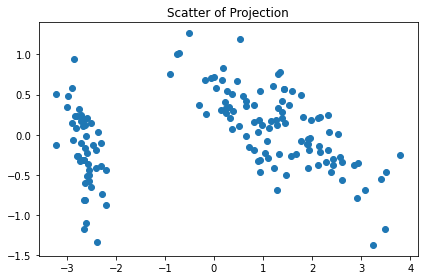

In [15]:
plt.plot(Proj[0, :], Proj[1, :], 'o')

plt.title('Scatter of Projection')
plt.tight_layout()

In [16]:
# Reconstruct
ReconstData = np.matmul(Vs[:, 0:2], Proj) + dataMean.T
print(ReconstData.shape)

(4, 150)


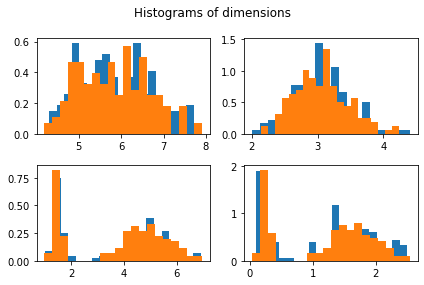

In [17]:
# Plot data in histogram
plt.subplot(2, 2, 1)
plt.hist(irisInputs[0], bins=20, density=True)
plt.hist(ReconstData[0, :], bins=20, density=True)

plt.subplot(2, 2, 2)
plt.hist(irisInputs[1], bins=20, density=True)
plt.hist(ReconstData[1, :], bins=20, density=True)

plt.subplot(2, 2, 3)
plt.hist(irisInputs[2], bins=20, density=True)
plt.hist(ReconstData[2, :], bins=20, density=True)

plt.subplot(2, 2, 4)
plt.hist(irisInputs[3], bins=20, density=True)
plt.hist(ReconstData[3, :], bins=20, density=True)

plt.suptitle('Histograms of dimensions');

plt.tight_layout()

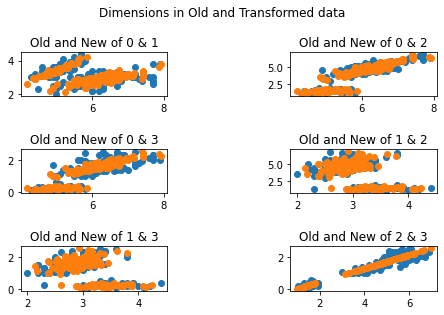

In [18]:
# Plot data in correlation scatter plot between dimensions
plt.subplot(3, 2, 1)
plt.plot(irisInputs[0, :], irisInputs[1, :], 'o')
plt.plot(ReconstData[0, :], ReconstData[1, :], 'o')
plt.title('Old and New of 0 & 1')

plt.subplot(3, 2, 2)
plt.plot(irisInputs[0, :], irisInputs[2, :], 'o')
plt.plot(ReconstData[0, :], ReconstData[2, :], 'o')
plt.title('Old and New of 0 & 2')

plt.subplot(3, 2, 3)
plt.plot(irisInputs[0, :], irisInputs[3, :], 'o')
plt.plot(ReconstData[0, :], ReconstData[3, :], 'o')
plt.title('Old and New of 0 & 3')

plt.subplot(3, 2, 4)
plt.plot(irisInputs[1, :], irisInputs[2, :], 'o')
plt.plot(ReconstData[1, :], ReconstData[2, :], 'o')
plt.title('Old and New of 1 & 2')

plt.subplot(3, 2, 5)
plt.plot(irisInputs[1, :], irisInputs[3, :], 'o')
plt.plot(ReconstData[1, :], ReconstData[3, :], 'o')
plt.title('Old and New of 1 & 3')

plt.subplot(3, 2, 6)
plt.plot(irisInputs[2, :], irisInputs[3, :], 'o')
plt.plot(ReconstData[2, :], ReconstData[3, :], 'o')
plt.title('Old and New of 2 & 3')

plt.suptitle('Dimensions in Old and Transformed data', y=1.05)
plt.tight_layout(pad=0.1, h_pad=2, w_pad=10)

From the comparison between the old and new, we can see that they are similar in both the density of columns and the general correlation between two dimensions, and in the transformed data, the correlation between different variables in the original data is better expressed, and the most unrelated associations are dropped(we can see from the dimension 2 & 3 ). On the whole, the data is more centralized and reflects the relationship between variables better.

# Part 2

In [19]:
## Load the face data
## Each column represents a single face, but the 1600 pixels must be reshaped into a 40x40 image.

facemat = np.loadtxt("faces_40x40_500.csv", delimiter=",")
m, n = facemat.shape
print(m, n)

1600 500


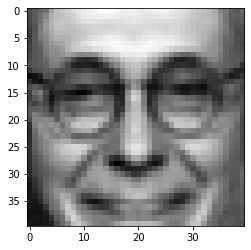

In [20]:
# Extract the first column
face1col = facemat[:, 0]

# Reshape to create a 40x40 image, transpose so it's not sideways
face1 = face1col.reshape((40, 40)).T

# Plot using grayscale
plt.imshow(face1, cmap="gray")

Text(0.5, 0.98, 'Display of the first 25 faces')

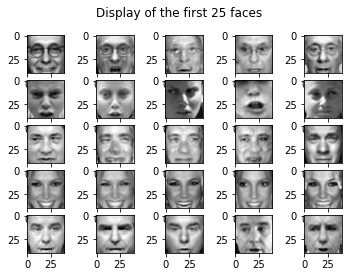

In [21]:
#Looping and display faces of head 25
for i in list(range(25)):
    face1col = facemat[:, i]
    face1 = face1col.reshape((40, 40)).T
    plt.subplot(5, 5, i + 1)
    plt.imshow(face1, cmap="gray")

plt.suptitle('Display of the first 25 faces')

Text(0.5, 0.98, 'Mean Face')

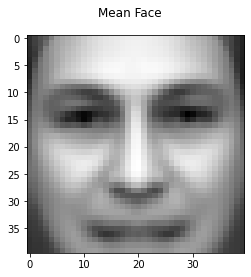

In [22]:
# The Mean Face
mean1600d = facemat.mean(axis=1)
face1Mean = mean1600d.reshape((40, 40)).T
plt.imshow(face1Mean, cmap="gray")
plt.suptitle('Mean Face')

In [23]:
dataMean = np.tile(mean1600d, (n, 1))

In [24]:
## Create Z, the zero-meaned data matrix

Z = facemat - dataMean.T
print(Z.shape)

(1600, 500)


In [25]:
# Coveriance matrix of Z

C = np.matmul(Z, Z.T) / (n - 1)
print(C.shape, 'The size is correct')

(1600, 1600) The size is correct


In [26]:
# Eigenvectors V annd eigennvalues D of C
D, V = np.linalg.eigh(C)
print(V.shape, D.shape)

(1600, 1600) (1600,)


In [27]:
# Sort the Vectors based on values
idx = D.argsort()[::-1]
Vs = V[:, idx]
print(Vs.shape)

(1600, 1600)


Text(0.5, 0.98, 'Display of the first 25 eigen faces')

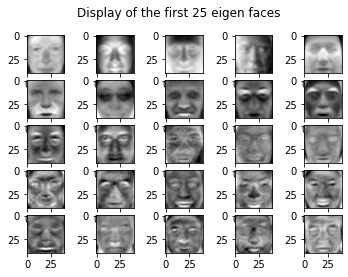

In [28]:
#Looping and display faces of eigen first 25
for i in list(range(25)):
    face1col = Vs[:, i]
    face1 = face1col.reshape((40, 40)).T
    plt.subplot(5, 5, i + 1)
    plt.imshow(face1, cmap="gray")
    
plt.suptitle('Display of the first 25 eigen faces')

In [29]:
# Project with only 20 columns
Proj20 = np.matmul(Vs[:, 0:20].T, Z)
print(Proj20.shape)

# Project with 40 columns
Proj40 = np.matmul(Vs[:, 0:40].T, Z)
print(Proj40.shape)

# Project with 80 columns
Proj80 = np.matmul(Vs[:, 0:80].T, Z)
print(Proj80.shape)

# Project with 120 columns
Proj120 = np.matmul(Vs[:, 0:120].T, Z)
print(Proj120.shape)

(20, 500)
(40, 500)
(80, 500)
(120, 500)


In [30]:
# Reconstruct
ReconstData20 = np.matmul(Vs[:, 0:20], Proj20) + dataMean.T
print(ReconstData20.shape)

ReconstData40 = np.matmul(Vs[:, 0:40], Proj40) + dataMean.T
print(ReconstData40.shape)

ReconstData80 = np.matmul(Vs[:, 0:80], Proj80) + dataMean.T
print(ReconstData80.shape)

ReconstData120 = np.matmul(Vs[:, 0:120], Proj120) + dataMean.T
print(ReconstData120.shape)

(1600, 500)
(1600, 500)
(1600, 500)
(1600, 500)


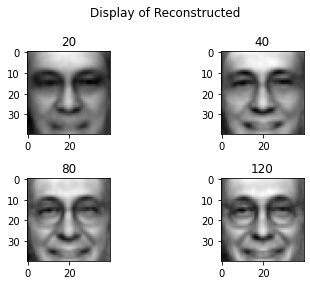

In [31]:
plt.subplot(2, 2, 1)
face1col = ReconstData20[:, 0]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")
plt.title('20')

plt.subplot(2, 2, 2)
face1col = ReconstData40[:, 0]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")
plt.title('40')

plt.subplot(2, 2, 3)
face1col = ReconstData80[:, 0]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")
plt.title('80')

plt.subplot(2, 2, 4)
face1col = ReconstData120[:, 0]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")
plt.title('120')

plt.suptitle('Display of Reconstructed')
plt.tight_layout()

From the graphs above, we can see the pattern of convergence, while the more components we take, the more similar it will be(80 & 120 components are almost the same with differences in some details, which getting closer to the original picture). Since the components well represented the common signs of the faces(the most important characteristics of a face), overwhelming components will result in overfitting, and a proper degree of PCA can help us to identify the facial pattern of different faces.

## Puffin

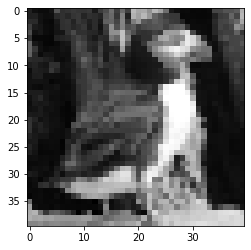

In [32]:
facemat = np.loadtxt("puffin.csv", delimiter=",")
n = facemat.shape[0]

face1col = facemat[:]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")

In [33]:
meanPuff = np.mean(facemat)
print(meanPuff)

79.52815686243875


In [34]:
ZPuff = facemat - meanPuff
ProjPuff = np.matmul(Vs[:, 0:120].T, ZPuff)
ReconstDataPuff = np.matmul(Vs[:, 0:120], ProjPuff) + meanPuff
print(ReconstDataPuff.shape)

(1600,)


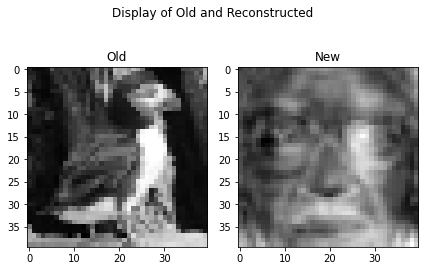

In [35]:
plt.subplot(1, 2, 1)
plt.imshow(face1, cmap="gray")
plt.title('Old')

plt.subplot(1, 2, 2)
face1col = ReconstDataPuff[:]
face1 = face1col.reshape((40, 40)).T
plt.imshow(face1, cmap="gray")
plt.title('New')

plt.suptitle('Display of Old and Reconstructed')
plt.tight_layout()

When projecting the puffin with the components of human faces, the puffin was stretched into a face of human, but with some characteristics of bird(beak and colors around its eyes). That is to say, reconstruct a bird with principal components of human faces, which move the data point of the bird in 1600 dimensions space to a place with mostly human component direction.